<a href="https://colab.research.google.com/github/DavidGlezGmz/Neural-Networks/blob/main/Basic_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import time

# 1. Datos Iniciales

In [5]:
err_vector = [] #Vector de error
w_f = [] #Vector de Pesos Finales

#---------------------------------------------------------------------

#Vectores de Entrada
x = np.array([[4,2],[5,4], [7,5],[9,4],[3,6],[4,8],[6,7],[8,8]])
print(f"Entradas:\n{x}\n")

#Bias o Umbral
bias = np.shape(x)[0] # [0] =  Numero de columnas, [1] = Numero de Filas
bias = -1*np.ones((bias,1))
#print(f"Bias para Matriz de Vector aumentado:\n{bias}\n")

#Vector Aumentado
x = np.concatenate([x,bias], axis = 1) # 1 = Derecha, 0 = Abajo
print(f"Matriz Aumentado:\n{x}\n")

#Targets ó Salida Deseada
t = np.array([[0],[0],[0],[0],[1],[1],[1],[1]])
print(f"Salida Deseada:\n{t}\n")

#Pesos y Umbral
w_i = np.array([[0.5],[0.5],[0.5]])
print(f"Pesos y Umbral (Bias) INICIAL:\n{w_i}\n")

#alpha (Aprendizaje )
alpha = 0.25
print(f"Alpha : {alpha}\n")

Entradas:
[[4 2]
 [5 4]
 [7 5]
 [9 4]
 [3 6]
 [4 8]
 [6 7]
 [8 8]]

Matriz Aumentado:
[[ 4.  2. -1.]
 [ 5.  4. -1.]
 [ 7.  5. -1.]
 [ 9.  4. -1.]
 [ 3.  6. -1.]
 [ 4.  8. -1.]
 [ 6.  7. -1.]
 [ 8.  8. -1.]]

Salida Deseada:
[[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]

Pesos y Umbral (Bias) INICIAL:
[[0.5]
 [0.5]
 [0.5]]

Alpha : 0.25



# 2. Modelo

In [6]:
#REGLA DEL PERCEPTRON

tic = time.time() #Iniciamos Cronómetro para calcular tiempo de ejecución

r = np.dot(x, w_i) # r = p1x1 + p2x2 - Bias
print(f"r= \n{r}\n")

y = np.uint32(r >= 0) # Función Límite Duro (Salida Calculada)
print(f"(Salida Calculada) y = \n{y}\n")

err = sum((t - y) ** 2) / len(y) #Se calcula el Error cuadrático medio MSE entre t,y
err_vector.append(err)
print(f"Error : \n{err_vector}\n")

epoch = 0

while (sum(y != t)):
  epoch += 1
  print(f"Epoca : \n{epoch}\n")

  for i in range(np.shape(x)[0]):
    r = np.dot(x[i], w_i) #producto punto
    y[i] = np.uint32(r >= 0) # Función Límite Duro (Salida Calculada NUEVA)
    x_p = np. reshape (x[i], (len(w_i), 1)) # Se deja unicamente los valores vectoriales de la matriz "Vector Aumentado"
    w_n = w_i + alpha * (t[i] - y[i]) * x_p # Cálculo de los nuevos Pesos
    w_i = w_n

  err = sum((t - y) ** 2)/len(y) #Se calcula el Error cuadrático medio MSE entre t,y
  err_vector.append(err)
  print(f"Error:{err}\n")

  w_f.append(w_i)
  print(f"Pesos finales:\n{w_i}\n")

toc = time.time ()


r= 
[[2.5]
 [4. ]
 [5.5]
 [6. ]
 [4. ]
 [5.5]
 [6. ]
 [7.5]]

(Salida Calculada) y = 
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]

Error : 
[array([0.5])]

Epoca : 
1

Error:[0.25]

Pesos finales:
[[0.25]
 [1.5 ]
 [0.5 ]]

Epoca : 
2

Error:[0.125]

Pesos finales:
[[-0.75]
 [ 1.  ]
 [ 0.75]]

Epoca : 
3

Error:[0.]

Pesos finales:
[[-0.75]
 [ 1.  ]
 [ 0.75]]



# 3. Resultados

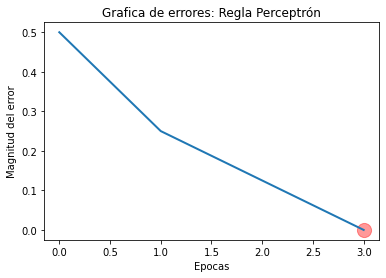

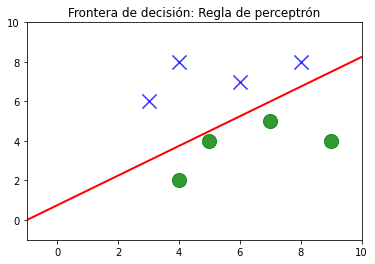

In [7]:
#GRAFICAR ERRORES
plt.figure(0)
plt.plot (err_vector, linewidth = 2)
plt.title ('Grafica de errores: Regla Perceptrón')
plt.ylabel ('Magnitud del error')
plt.xlabel ('Epocas')
plt.scatter(len (err_vector) - 1, 0, color= 'r', s=200, marker= 'o', alpha = 0.4)
plt.show ()


#GRAFICAR TLU 
plt.xlim ([-1.0, 10.0])
plt.ylim ([-1.0, 10.0])

patterns = np.unique(t)

for patt in patterns:
  pos = np.where(patt == t)[0]

  if patt == 0:
    plt.scatter(x[pos,0], x[pos,1], color= 'g', s=200, marker= 'o', alpha = 0.8)
  else:
    plt.scatter(x[pos,0], x[pos,1], color= 'b', s=200, marker= 'x', alpha = 0.8)

x1 = np.linspace(-1,12)
x2 = -(w_i[0]/w_i[1])*x1 + (w_i[2]/w_i[1])

plt.figure(1)
plt.plot (x1,x2,'red', linewidth = 2)
plt.title ("Frontera de decisión: Regla de perceptrón")
plt.show()


In [8]:
#Pesos Finales
print('\nPesos finales: ')
for i in range(1):
    res = str(w_i)
    print(res)
    print()


# Resultados Finales, comparación
a = np.dot(x, w_i)
y= np.uint32(a >= 0)

print('REGLA DEL PERCEPTRON')
print('Meta:    Predicción:')
for i in range(len(y)):
    res = str(t[i]) + '--------' + str(y[i])
    print(res)

print(f'\nTiempo requerido: {toc - tic:.5f} ms.')
print(f'\nÉpocas requeridas: {epoch}.')


Pesos finales: 
[[-0.75]
 [ 1.  ]
 [ 0.75]]

REGLA DEL PERCEPTRON
Meta:    Predicción:
[0]--------[0]
[0]--------[0]
[0]--------[0]
[0]--------[0]
[1]--------[1]
[1]--------[1]
[1]--------[1]
[1]--------[1]

Tiempo requerido: 0.01221 ms.

Épocas requeridas: 3.
